Texthero is a python package to work with text data efficiently.  
It's easier to use compared to nltk package.  
introduction:https://texthero.org/  
Text preprocessing, representation and visualization from zero to hero.Let's start.

In [1]:
import texthero as hero
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from texthero import preprocessing
from texthero import stopwords

## 1.Data Visualization and Data Cleaning

In [2]:
df = pd.read_csv("Reviews.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [4]:
df.nunique()

Id                        568454
ProductId                  74258
UserId                    256059
ProfileName               218416
HelpfulnessNumerator         231
HelpfulnessDenominator       234
Score                          5
Time                        3168
Summary                   295742
Text                      393579
dtype: int64

In [5]:
df1 = df.dropna()

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568411 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568411 non-null  int64 
 1   ProductId               568411 non-null  object
 2   UserId                  568411 non-null  object
 3   ProfileName             568411 non-null  object
 4   HelpfulnessNumerator    568411 non-null  int64 
 5   HelpfulnessDenominator  568411 non-null  int64 
 6   Score                   568411 non-null  int64 
 7   Time                    568411 non-null  int64 
 8   Summary                 568411 non-null  object
 9   Text                    568411 non-null  object
dtypes: int64(5), object(5)
memory usage: 47.7+ MB


In [7]:
df1.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [8]:
df1.duplicated(subset={"ProductId","UserId","Summary"}).value_counts()

False    566781
True       1630
dtype: int64

In [9]:
df2 = df1.drop_duplicates(subset={"ProductId","UserId","Summary"},keep="first")

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566781 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      566781 non-null  int64 
 1   ProductId               566781 non-null  object
 2   UserId                  566781 non-null  object
 3   ProfileName             566781 non-null  object
 4   HelpfulnessNumerator    566781 non-null  int64 
 5   HelpfulnessDenominator  566781 non-null  int64 
 6   Score                   566781 non-null  int64 
 7   Time                    566781 non-null  int64 
 8   Summary                 566781 non-null  object
 9   Text                    566781 non-null  object
dtypes: int64(5), object(5)
memory usage: 47.6+ MB


In [11]:
df2["Sentiment"] = df2["Score"].apply(lambda x:"positive" if x >=3 else "negative")

In [12]:
df2.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,positive


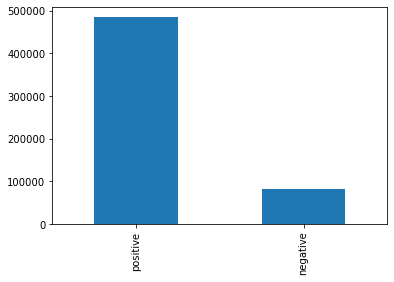

In [13]:
df2["Sentiment"].value_counts().plot.bar()

In [14]:
df3 = df2[["Score","Summary","Sentiment"]]

In [15]:
df3.head()

,Score,Summary,Sentiment
0,5,Good Quality Dog Food,positive
1,1,Not as Advertised,negative
2,4,"""Delight"" says it all",positive
3,2,Cough Medicine,negative
4,5,Great taffy,positive


remove negative words from default stopwords

In [16]:
default_stopwords = stopwords.DEFAULT
len(default_stopwords)

179

In [17]:
neg_word = ["no","not","isn't","don't","aren't","can't","couldn't","wouldn't","won't","but","however"]
for word in neg_word:
    if word in default_stopwords:
        default_stopwords.remove(word)
    else:
        continue
len(default_stopwords)

170

custom data cleaning

In [18]:
custom_pipeline = [preprocessing.fillna,
                   preprocessing.lowercase,
                   preprocessing.remove_whitespace,
                   preprocessing.remove_stopwords,
                   preprocessing.remove_digits,
                   preprocessing.remove_punctuation,
                   preprocessing.remove_diacritics,
                   preprocessing.stem
                  ]
df3['clean_summary'] = hero.clean(df3['Summary'], custom_pipeline)
df3.head()

,Score,Summary,Sentiment,clean_summary
0,5,Good Quality Dog Food,positive,good qualiti dog food
1,1,Not as Advertised,negative,not advertis
2,4,"""Delight"" says it all",positive,delight say
3,2,Cough Medicine,negative,cough medicin
4,5,Great taffy,positive,great taffi


In [19]:
df_positive = df3[df3['Sentiment']=="positive"]
df_positive.head()

,Score,Summary,Sentiment,clean_summary
0,5,Good Quality Dog Food,positive,good qualiti dog food
2,4,"""Delight"" says it all",positive,delight say
4,5,Great taffy,positive,great taffi
5,4,Nice Taffy,positive,nice taffi
6,5,Great! Just as good as the expensive brands!,positive,great good expens brand


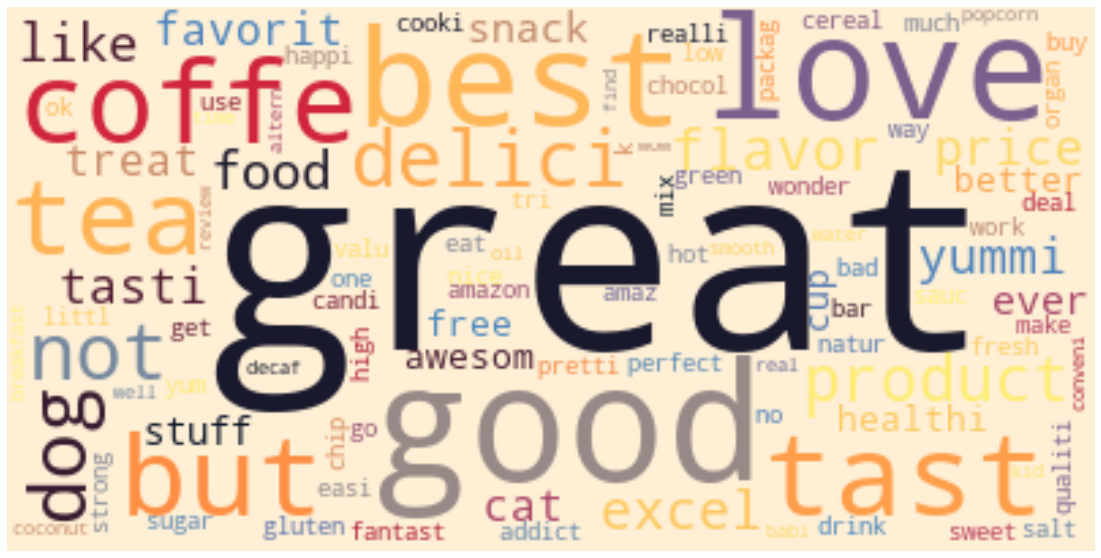

In [20]:
hero.visualization.wordcloud(df_positive["clean_summary"],max_words=100)

In [21]:
hero.visualization.top_words(df_positive["clean_summary"])

great       71052
good        49016
love        37792
best        32961
tast        24294
            ...  
cobi            1
kwchef          1
amazinhg        1
chipzorz        1
mariad          1
Name: clean_summary, Length: 22985, dtype: int64

In [22]:
df_negative = df3[df3['Sentiment']=="negative"]
df_negative.head()

,Score,Summary,Sentiment,clean_summary
1,1,Not as Advertised,negative,not advertis
3,2,Cough Medicine,negative,cough medicin
12,1,My Cats Are Not Fans of the New Food,negative,cat not fan new food
16,2,poor taste,negative,poor tast
26,1,Nasty No flavor,negative,nasti no flavor


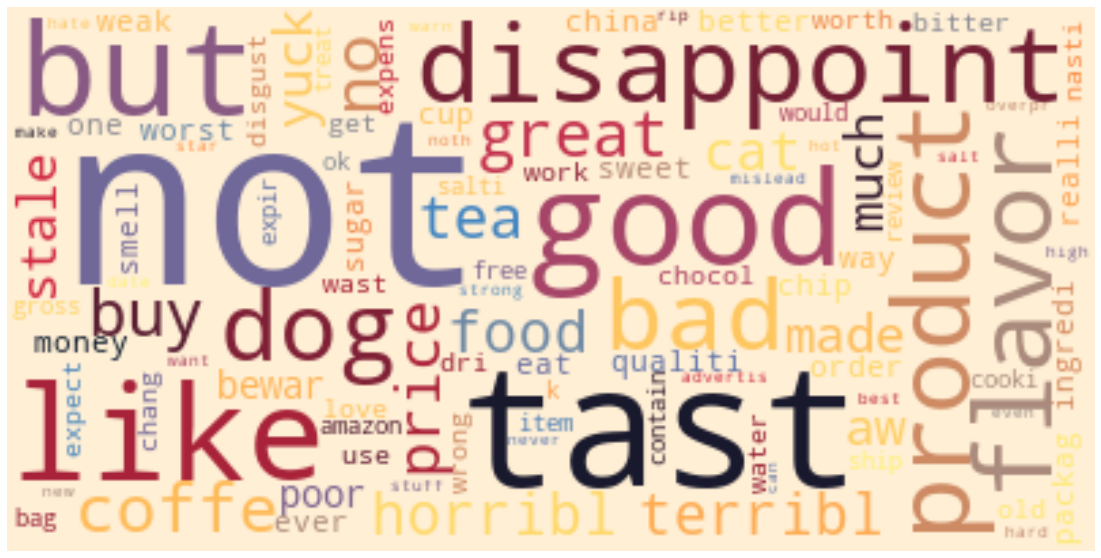

In [23]:
hero.visualization.wordcloud(df_negative["clean_summary"],max_words=100)

In [24]:
hero.visualization.top_words(df_negative["clean_summary"])

not      14812
tast      6305
good      3703
like      3677
but       3514
         ...  
buis         1
jnb          1
porki        1
oprah        1
infom        1
Name: clean_summary, Length: 9497, dtype: int64

I have doubt in the negative summary which contains "good".Let's have a look.

In [25]:
df_negative[df_negative['clean_summary'].isin(["good"])]

,Score,Summary,Sentiment,clean_summary
71062,2,They Just Aren't Very Good,negative,good
117986,1,It isn't good.,negative,good
252258,2,1/2 good,negative,good
256556,1,Good for you???,negative,good
320420,1,good,negative,good
467726,2,Good for what it is,negative,good
543917,2,Can't be good for you,negative,good


From the dataframe above,we can see data cleaning for negative summary is not enough good.For example, in the row 71062, the correct  
clean_summary should be "aren't good",but in fact the result is "good".  
Later, I will see whether I can improve the quality of data cleaning for negative summary.

In [26]:
df_negative[df_negative['clean_summary'].isin(["not good"])]

,Score,Summary,Sentiment,clean_summary
229,1,Not Good,negative,not good
552,2,Not so good.,negative,not good
1012,1,Not good,negative,not good
1444,1,Not very good,negative,not good
1455,2,not good,negative,not good
...,...,...,...,...
567729,1,Not good!,negative,not good
567786,2,Not Good,negative,not good
567812,1,Not good,negative,not good
567829,2,Not Good,negative,not good


From the dataframe above,I find that "good" in negative summary is always together with "not".

## 2.Data split and Feature Engineering

In [29]:
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df3,test_size=0.2,random_state=1)
print("the length of train dataset is {0}".format(df_train.shape[0]))
print("the length of test dataset is {0}".format(df_test.shape[0]))

the length of train dataset is 453424
the length of test dataset is 113357


In [30]:
df_train = df_train.reset_index(drop=True)
df_train.head()

,Score,Summary,Sentiment,clean_summary
0,5,Good buy,positive,good buy
1,5,Worth it,positive,worth
2,5,Just what the doctor ordered!,positive,doctor order
3,5,Tasty Biscuit From Britain,positive,tasti biscuit britain
4,5,Just What I Need to Start my Day,positive,need start day


The memory of my computer is not enough, so I cut the training dataset into five pieces for feature engineering.

In [31]:
i= 0
tfidf = pd.Series()
while i < df_train.shape[0]-1:
    if (i + 100000) < (df_train.shape[0]-1):
        train_a = df_train.iloc[i:(i + 100000)][:]
        s = hero.tfidf(train_a['clean_summary'],min_df=10,max_features=1000)
        if len(tfidf)== 0:
            tfidf = s.copy()
        else:
            tfidf = pd.concat([tfidf,s])
        i += 100000
        print("success:{0}samples".format(i))
    else:
        train_a = df_train.iloc[400000:][:]
        s = hero.tfidf(train_a['clean_summary'],min_df=10,max_features=1000)
        tfidf = pd.concat([tfidf,s])
        print("success:all samples")
        break

success:100000samples
success:200000samples
success:300000samples
success:400000samples
success:all samples


In [32]:
df_train["tfidf"] = tfidf

In [33]:
df_train.head()

,Score,Summary,Sentiment,clean_summary,tfidf
0,5,Good buy,positive,good buy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,5,Worth it,positive,worth,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,5,Just what the doctor ordered!,positive,doctor order,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,5,Tasty Biscuit From Britain,positive,tasti biscuit britain,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,5,Just What I Need to Start my Day,positive,need start day,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [36]:
df_test = df_test.reset_index(drop=True)
df_test.head()

,Score,Summary,Sentiment,clean_summary
0,5,Yummy!!!,positive,yummi
1,4,Tasty but high priced,positive,tasti but high price
2,5,perfect,positive,perfect
3,4,Fine Product,positive,fine product
4,5,The best,positive,best


In [37]:
df_test["tfidf"] = hero.tfidf(df_test['clean_summary'],min_df=10,max_features=1000)

In [38]:
df_test.head()

,Score,Summary,Sentiment,clean_summary,tfidf
0,5,Yummy!!!,positive,yummi,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,4,Tasty but high priced,positive,tasti but high price,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,5,perfect,positive,perfect,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,4,Fine Product,positive,fine product,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,5,The best,positive,best,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


## 3.Model Building and Evaluation

In [58]:
from sklearn.ensemble import RandomForestClassifier
import collections

I transform series to list for model training.

In [48]:
vector_train =[]
for i in range(len(df_train)):
    vector_train.append(df_train.iloc[i]["tfidf"])

In [54]:
vector_test =[]
for i in range(len(df_test)):
    vector_test.append(df_test.iloc[i]["tfidf"])

In [51]:
rf  = RandomForestClassifier(n_estimators = 30, n_jobs = -1)
rf.fit(vector_train,df_train["Sentiment"])

RandomForestClassifier(n_estimators=30, n_jobs=-1)

In [57]:
prediction = dict() # store predict result
prediction['tfidf'] = rf.predict(vector_test)

In [59]:
print('test data')
print(df_test['Sentiment'].value_counts())
print('--------------')
print('predicted data')
print(collections.Counter(prediction['tfidf']))

test data
positive    97108
negative    16249
Name: Sentiment, dtype: int64
--------------
predicted data
Counter({'positive': 106148, 'negative': 7209})


In [60]:
prob = dict() # store predict result
prob['tfidf'] = rf.predict_proba(vector_test)
prob['tfidf'][0:10,1]

array([0.99126322, 0.87777778, 0.99609108, 0.72524561, 0.97598441,
       0.88666667, 0.48727321, 0.81888865, 0.83333333, 0.91438438])

In [61]:
from sklearn.metrics import roc_curve, auc,classification_report

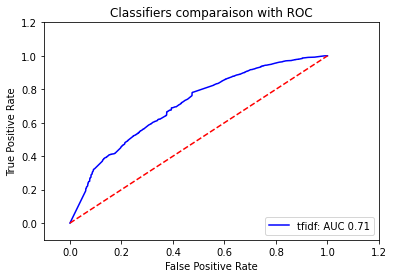

In [62]:
cmp = 0
colors = ['b', 'g', 'y', 'm', 'k']
for model, predicted in prediction.items():
    false_positive_rate, true_positive_rate, thresholds = \
            roc_curve(df_test['Sentiment'].values, prob[model][:,1], pos_label = 'positive')
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
    cmp += 1

plt.title('Classifiers comparaison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [66]:
print(classification_report(df_test['Sentiment'].values, prediction['tfidf']))

              precision    recall  f1-score   support

    negative       0.44      0.20      0.27     16249
    positive       0.88      0.96      0.92     97108

    accuracy                           0.85    113357
   macro avg       0.66      0.58      0.59    113357
weighted avg       0.81      0.85      0.82    113357



The prediction result is not very good ,I guess the reason is that  "max_features" in hero.tfidf is set only 1000. 1000 is too small.
Because of the low performance of my computer, I can't set the value larger.

## 4. Feature Importance

In [70]:
importance = rf.feature_importances_
importance

array([0.00049712, 0.00055982, 0.00051952, 0.00064813, 0.00055611,
       0.00076428, 0.00085835, 0.00028781, 0.00105683, 0.00107994,
       0.00063539, 0.00066713, 0.0004072 , 0.00049537, 0.00011011,
       0.00013264, 0.00024701, 0.00058656, 0.00045707, 0.00041547,
       0.00039086, 0.00078621, 0.00103041, 0.00133171, 0.00115815,
       0.00050427, 0.00044473, 0.00053005, 0.00056362, 0.00033603,
       0.00051963, 0.00020255, 0.00024825, 0.00028569, 0.00029422,
       0.00055335, 0.00119946, 0.00127459, 0.00068827, 0.0005502 ,
       0.00025913, 0.00209748, 0.00059008, 0.0017647 , 0.00290848,
       0.0015532 , 0.00096432, 0.00080889, 0.00076424, 0.00287697,
       0.0009953 , 0.00297452, 0.00321762, 0.00486978, 0.00080978,
       0.00070036, 0.00026064, 0.00062962, 0.00061485, 0.00072334,
       0.000453  , 0.00024629, 0.00054099, 0.00030045, 0.00051532,
       0.00061094, 0.00053884, 0.00043991, 0.00026626, 0.0005399 ,
       0.00032176, 0.00048644, 0.0032867 , 0.00087429, 0.00025

the ten smallest feature importance values

In [74]:
np.sort(importance)[0:10]


array([0.00011011, 0.00011144, 0.0001227 , 0.00012609, 0.00013264,
       0.00013525, 0.00014707, 0.00015509, 0.00015698, 0.00016108])

Because the default value of "return_features_names"  in hero.tfidf is False， I can't get the feature names.  
So I can't visualize the feature importance.